In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load your dataset
data = pd.read_csv('/content/house property.csv')  # Replace with your dataset path
data

,saledate,MA,type,bedrooms
0,30-09-2007,441854,house,2
1,31-12-2007,441854,house,2
2,31-03-2008,441854,house,2
3,30-06-2008,441854,house,2
4,30-09-2008,451583,house,2
...,...,...,...,...
342,30-09-2018,603281,unit,3
343,31-12-2018,601167,unit,3
344,31-03-2019,605637,unit,3
345,30-06-2019,599339,unit,3


In [4]:
# Assuming your moving average values are in a column named 'MA'
ma_values = data['MA'].values.reshape(-1, 1)

In [5]:
# Step 2: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_ma = scaler.fit_transform(ma_values)


In [6]:
# Step 3: Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [7]:
# Define time step
time_step = 10  # You can adjust this value
X, y = create_dataset(scaled_ma, time_step)

In [8]:
# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# Step 4: Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [10]:
# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Step 6: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 7: Make predictions
predictions = model.predict(X_test)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1846
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0299
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0301
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0230
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0220
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0220
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0160
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0137
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0193
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0176
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0121
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0126
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0151
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━

In [13]:
# Step 8: Inverse transform the predictions
predictions_inverse = scaler.inverse_transform(predictions)

# Print the predicted values
print("Predicted Values (Inverse Transformed):")
print(predictions_inverse)

Predicted Values (Inverse Transformed):
[[428173.34]
 [428613.66]
 [429224.75]
 [430016.1 ]
 [430802.16]
 [431503.5 ]
 [431898.5 ]
 [431936.62]
 [431741.16]
 [431363.28]
 [430846.97]
 [430234.  ]
 [429664.78]
 [429166.88]
 [428674.16]
 [428223.75]
 [427727.2 ]
 [427273.34]
 [426875.7 ]
 [426421.53]
 [425814.4 ]
 [438611.78]
 [458399.16]
 [480036.8 ]
 [499728.8 ]
 [515174.25]
 [525411.5 ]
 [530603.2 ]
 [531599.1 ]
 [530274.1 ]
 [527368.8 ]
 [528524.1 ]
 [531421.06]
 [535512.5 ]
 [542414.6 ]
 [549212.44]
 [554352.3 ]
 [556194.2 ]
 [554150.1 ]
 [551804.5 ]
 [548979.8 ]
 [548172.56]
 [550441.1 ]
 [555953.3 ]
 [565680.06]
 [575853.44]
 [585489.75]
 [592331.8 ]
 [595877.75]
 [600106.25]
 [603476.9 ]
 [606401.25]
 [609083.25]
 [611479.9 ]
 [615253.56]
 [619606.75]
 [624607.44]
 [627601.2 ]
 [627751.  ]
 [626273.3 ]
 [623162.8 ]
 [619899.06]
 [616812.25]
 [614249.  ]
 [612819.7 ]
 [612289.8 ]
 [612145.1 ]
 [612622.06]]


In [14]:
# Step 9: Prepare actual values for comparison
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print actual values for comparison
print("Actual Values (Inverse Transformed):")
print(y_test_inverse)

Actual Values (Inverse Transformed):
[[429832.]
 [431567.]
 [432730.]
 [432791.]
 [432801.]
 [431418.]
 [430880.]
 [430654.]
 [430308.]
 [429897.]
 [429059.]
 [428878.]
 [428532.]
 [427856.]
 [427623.]
 [426970.]
 [426936.]
 [426669.]
 [425659.]
 [424412.]
 [518911.]
 [518911.]
 [518911.]
 [518911.]
 [518911.]
 [518911.]
 [518911.]
 [518911.]
 [523285.]
 [522862.]
 [524008.]
 [535063.]
 [538694.]
 [555117.]
 [550851.]
 [547981.]
 [539828.]
 [530987.]
 [540344.]
 [537592.]
 [548326.]
 [555644.]
 [566706.]
 [580696.]
 [581428.]
 [586470.]
 [583883.]
 [583370.]
 [598512.]
 [598812.]
 [599507.]
 [602877.]
 [603343.]
 [612295.]
 [617363.]
 [622045.]
 [616198.]
 [610618.]
 [606935.]
 [605273.]
 [606850.]
 [604413.]
 [604293.]
 [603434.]
 [603281.]
 [601167.]
 [605637.]
 [599339.]]


In [15]:
# Step 10: Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, predictions_inverse)
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predictions_inverse)

In [16]:
# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 393224622.7368164
Mean Absolute Error (MAE): 10969.006433823526
Root Mean Squared Error (RMSE): 19829.89215141667
R-squared (R²): 0.921060719109074


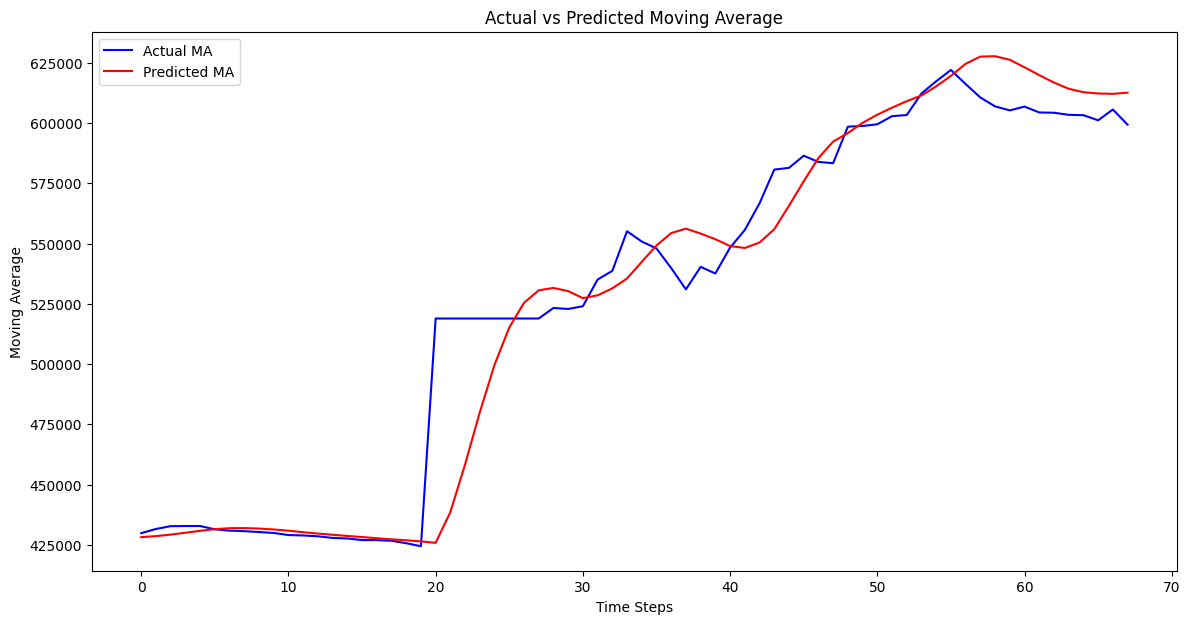

In [17]:
# Step 10: Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual MA', color='blue')
plt.plot(predictions_inverse, label='Predicted MA', color='red')
plt.title('Actual vs Predicted Moving Average')
plt.xlabel('Time Steps')
plt.ylabel('Moving Average')
plt.legend()
plt.show()